The Goal: Predict whether a passenger survived or not. 0 for not surviving, 1 for surviving.

In [1]:
# Importing reuired Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings # Ignores any warning
warnings.filterwarnings("ignore")

In [2]:
# Loading The data
titanic = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")

In [3]:
titanic.shape

(891, 12)

It means data has 891 observations(passengers) and 12 columns(passenger attributes).

In [4]:
# check the dataset information
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We can see here that there are int64, float64 and object(string) data types.

In [5]:
# To get the more idea about the dataset we can use the head function which will return the first 5 rows
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Let's try to understand the dataset and steps to go -
-It has 12 columns.
-Here we have 11 features using which we shall predict the target variable which is 'Survived'.
-Others are the features(predictors).
-Our first step would be to cleaning features so that it can be used as input to a ML model.

#we can use the info() and describe() method to get detailed statistics about the data.

In [6]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


One of the important objective data preprocessing and EDA is to remove the null values.
To do so we need to know where we have got null values. We will use heatmap inorder to have an idea on this.
To implement it seaborn library will be used.

<AxesSubplot:>

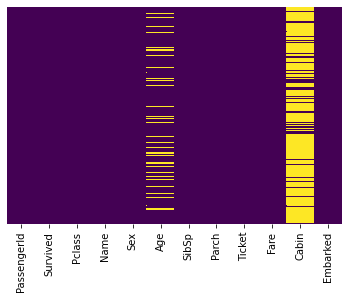

In [9]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Now, we need to impute the missing values of the ‘Age’ column. 
For that first we have to understand the relation between ‘Age’ and various other variables.

In [8]:
# seperating numeric and categorical attributes

titanic_num = titanic[['Age','SibSp','Parch','Fare']]
titanic_cat = titanic[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

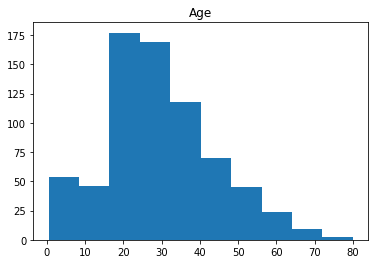

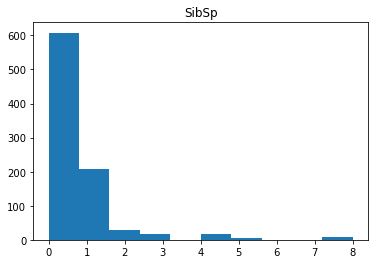

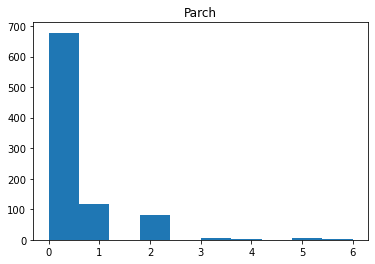

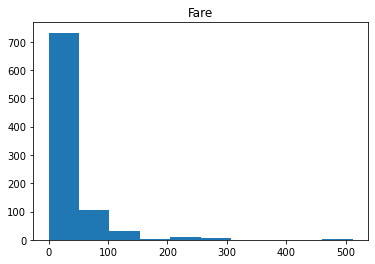

In [11]:
# Now let’s make plots of the numeric data:

for i in titanic_num.columns:
    plt.hist(titanic_num[i])
    plt.title(i)
    plt.show()

In [ ]:
As we can see, most of the distributions are scattered, except Age, it seems normalized.
We might consider normalizing them later on. Next, we plot a correlation heatmap between the numeric columns:

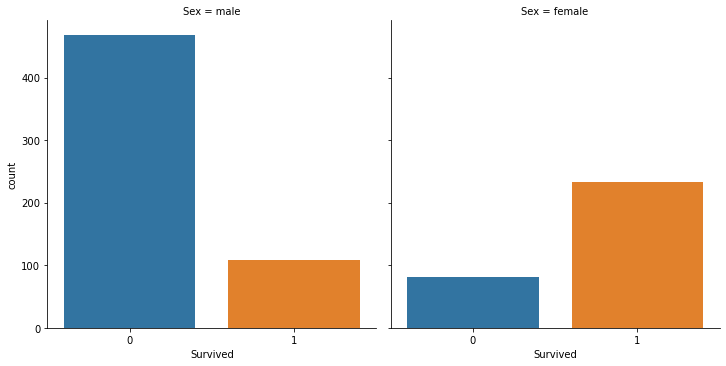

In [13]:
#Let us try to know if the dependent variable ‘Survived’ has any relation with the variable ‘Sex’.
sns.factorplot(x='Survived',col='Sex',kind='count',data=titanic)

In [ ]:
Inference:
    As we all know that females were given priority while saving passengers.
    The above graph also tells us the same story. More number of male passengers have died than female ones.


<AxesSubplot:xlabel='Survived', ylabel='count'>

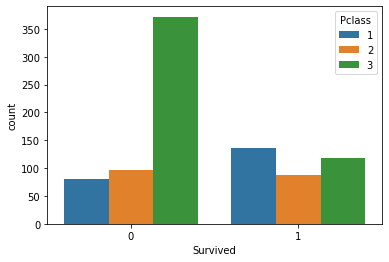

In [14]:
#Similarly let us try to see how the variable ‘Pclass’ is related to the variable ‘Survived’
sns.countplot(x='Survived',hue='Pclass',data=titanic)

Inference: 
  The graph tells us that Pclass 3 were more likely to be survived. 
  It was meant for the richer people while Pclass 1 were the most likely victims which was relatively less richer than class 3.

<AxesSubplot:xlabel='SibSp', ylabel='count'>

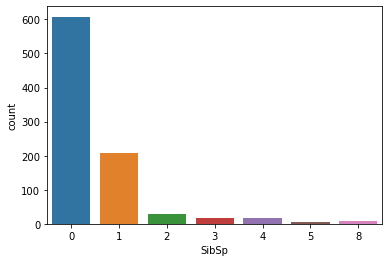

In [15]:
# Let us try to understand the column ‘Sibsip’ in detail. 
 
sns.countplot(x='SibSp',data=titanic)

Inference: 
    Here ‘SibSp’ variable refers to the number of sibling or spouse the person was accompanied with.
    We can see most of the people came alone.

<AxesSubplot:>

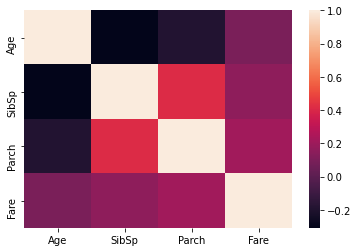

In [17]:
# Now, to find the correlation between different numeric features
sns.heatmap(titanic_num.corr())

Here we can see that Parch and SibSp has a higher correlation, which generally makes sense since Parents are more likely to 
travel with their multiple kids and spouses tend to travel together. 


In [18]:
#Next, let us compare survival rates across the numeric variables. 
pd.pivot_table(titanic, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


Inference:
1 The average age of survivors is 28, so young people tend to survive more.
2 People who paid higher fare rates were more likely to survive, more than double. This might be the people traveling in first-class.
3 In the 3rd column, passenger with parents had a higher chance of surviving. So the parents must have saved their kids before themselves.
4 And a child having siblings had less of a chance to survive.

#Now,we have to figure out a way to fill the missing value of the variable ‘Age’.
We segregate the ‘Age’ variable according to the Pclass variable as it was found out that ‘Age’ and ‘Pclass’ column were related.
#We would draw a boxplot that would tell us the mean value each of the Pclass. 

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

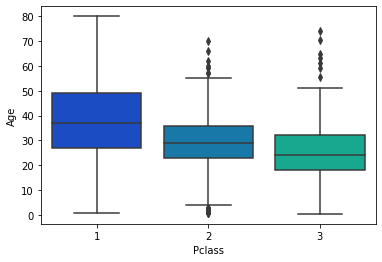

In [19]:
sns.boxplot(x='Pclass',y='Age',data=titanic,palette='winter')

From this graph we can find out the mean age for each of the Pclass. We would impute the same for missing ‘Age’ values.

#Now we do a similar thing with our categorical variables:

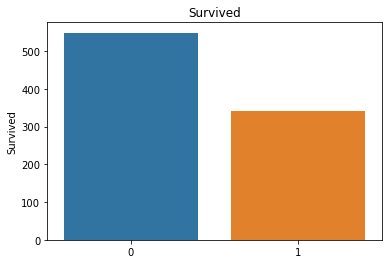

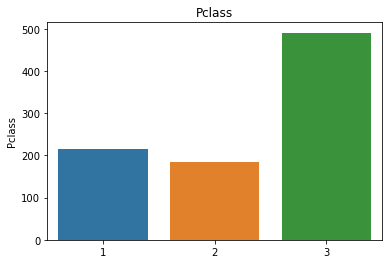

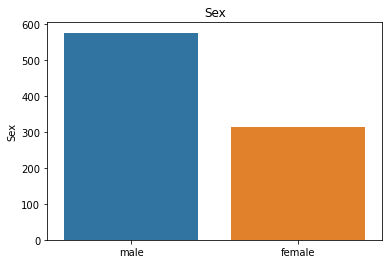

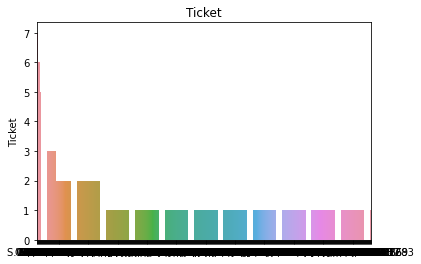

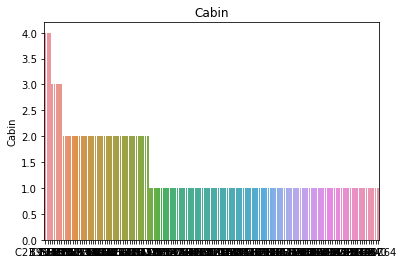

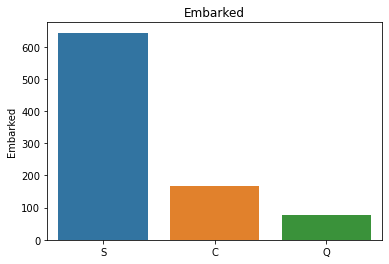

In [20]:
for i in titanic_cat.columns:
    sns.barplot(titanic_cat[i].value_counts().index,titanic_cat[i].value_counts()).set_title(i)
    plt.show()

The Ticket and Cabin graphs look very messy, we have to feature engineer them.
The rest of the graphs tell us:

Survived: Most of the people died in the shipwreck,  only around 300 people survived.
Pclass: The majority of the people traveling, had tickets of the 3rd class.
Sex: There were more males than females aboard the ship.
Embarked: Most of the passengers boarded the ship from Southampton.

In [21]:
# Now we will do EDA with our categorical variables, and compare them against our dependent variable, which is if people survived:

print(pd.pivot_table(titanic_cat, index = 'Survived', columns = 'Pclass',
                     values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(titanic_cat, index = 'Survived', columns = 'Sex', 
                     values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(titanic_cat, index = 'Survived', columns = 'Embarked', 
                     values = 'Ticket' ,aggfunc ='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


Pclass: We can see a lot more people survived from the First class than the Second or the Third class, even though the total number of passengers in the First class was much much less than the Third class.
        Thus our previous assumption that the rich survived is confirmed here, which might be relevant to model building.
Sex: Most of the women survived, and the majority of the male died in the shipwreck.
Embarked: It does not seem much relevant.

#We have to now convert the categorical values into numbers so that it can be used as an input to the model.

In [29]:
embark=pd.get_dummies(titanic_cat['Embarked'],drop_first=True)
sex=pd.get_dummies(titanic_cat['Sex'],drop_first=True)

We have to drop all the columns that do not provide any meaningful information like ‘Ticket’ along with the previous ‘Embarked’ and ‘Sex’ as they have been replaced.
Also we need add the newly created embark and sex column.

In [31]:
titanic_cat.drop(['Sex','Embarked','Ticket'],axis=1,inplace=True)
titanic_cat=pd.concat([titanic_cat,sex,embark],axis=1)

We saw that our ticket and cabin data don’t really make sense to us, and can affect the performance of the model, so we have to simplify some of this data with feature engineering.

-If we look at the actual cabin data, we see that there’s basically a letter and then a number.
-The letters might signify what type of cabin it is, where on the ship it is, which floor, which Class it is for, etc. 
And the numbers might signify the Cabin number.
-Let us first split them into individual cabins and see whether someone owned more than a single cabin

In [32]:
titanic_cat.Cabin
titanic['cabin_multiple'] = titanic.Cabin.apply(lambda x: 0 if pd.isna(x) 
                                                    else len(x.split(' ')))
titanic['cabin_multiple'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: cabin_multiple, dtype: int64

It shows that a majority did not have individual cabins, and only a few people owned more than one cabins.


In [33]:
#Now let’s see whether the survival rates depend on this:
pd.pivot_table(titanic, index = 'Survived', columns = 'cabin_multiple',
               values = 'Ticket' ,aggfunc ='count')

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


Now, let us look at the actual letter of the cabin they were in.
We could expect that the cabins with the same letter are roughly in the same locations, or on the same floors and
logically if a cabin was near the lifeboats, they had a better chance of survival.

In [34]:
# n stands for null
# in this case we will treat null values like it's own category

titanic['cabin_adv'] = titanic.Cabin.apply(lambda x: str(x)[0])

#comparing survival rates by cabin

print(titanic.cabin_adv.value_counts())
pd.pivot_table(titanic,index='Survived',columns='cabin_adv', 
                        values = 'Name', aggfunc='count')

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_adv, dtype: int64


cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [36]:
#We will just divide the tickets(have no significant effect on survival) into numeric and non-numeric for efficient usage:

titanic['numeric_ticket'] = titanic.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
titanic['ticket_letters'] = titanic.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1])
                                            .replace('.','').replace('/','')
                                            .lower() if len(x.split(' ')[:-1]) >0 else 0)

In [37]:
# Another interesting thing we can look at is the title of individual passengers. And whether it played any role in them getting a seat in the lifeboats.

titanic.Name.head(50)
titanic['name_title'] = titanic.Name.apply(lambda x: x.split(',')[1]
                                                        .split('.')[0].strip())
titanic['name_title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Mlle              2
Col               2
Lady              1
Capt              1
Ms                1
Sir               1
Mme               1
Jonkheer          1
the Countess      1
Don               1
Name: name_title, dtype: int64

We can see, the ship was boarded by people of many different classes, this might be useful for us in our model.
However it does not have effect on survival.

Data preprocessing for model :

In [ ]:
In this segment, we make our data, model-ready. The objectives we have to fulfill are listed below:

.Drop the null values from the Embarked column
.Include only relevant data
.Categorically transform all of the data, using something called a transformer.
.Impute data with the central tendencies for age and fare.
.Normalize the fare column to have a more normal distribution.
.using standard scaler scale data 0-1

#Cabin

In [38]:

# Feature that tells whether a passenger had a cabin on the Titanic (O if no cabin number, 1 otherwise)

titanic['Has_Cabin'] = titanic["Cabin"].apply(lambda x: 0 if type(x) == float else 1)

titanic[["Has_Cabin", "Survived"]].groupby(['Has_Cabin'], as_index=False).sum().sort_values(by='Survived', ascending=False)

,Has_Cabin,Survived
0,0,206
1,1,136


In [39]:
titanic[["Has_Cabin", "Survived"]].groupby(['Has_Cabin'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Has_Cabin,Survived
1,1,0.666667
0,0,0.299854


It appears that Has_Cabin has a strong impact on the Survival rate. We will keep this feature.

#Embarked

In [40]:
# Remove all NULLS in the Embarked column

titanic['Embarked'] = titanic['Embarked'].fillna('S')
# Mapping Embarked
titanic['Embarked'] = titanic['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    
train_pivot = pd.pivot_table(titanic, values= 'Survived',index=['Embarked'],columns='Pclass',aggfunc=np.mean, margins=True)
def color_negative_red(val):
    color = 'red' if val < 0.4 else 'black'
     # Takes a scalar and returns a string with the css property 'color: red' if below 0.4, black otherwise.
    return 'color: %s' % color
train_pivot = train_pivot.style.applymap(color_negative_red)
train_pivot

   


Pclass,1,2,3,All
Embarked,,,,
0,0.589147,0.463415,0.189802,0.339009
1,0.694118,0.529412,0.378788,0.553571
2,0.500000,0.666667,0.375000,0.389610
All,0.629630,0.472826,0.242363,0.383838


Irrespective of the class, passengers embarked in 0 (S) and 2 (Q) have lower chance of survival.
I will combine those into the first category.

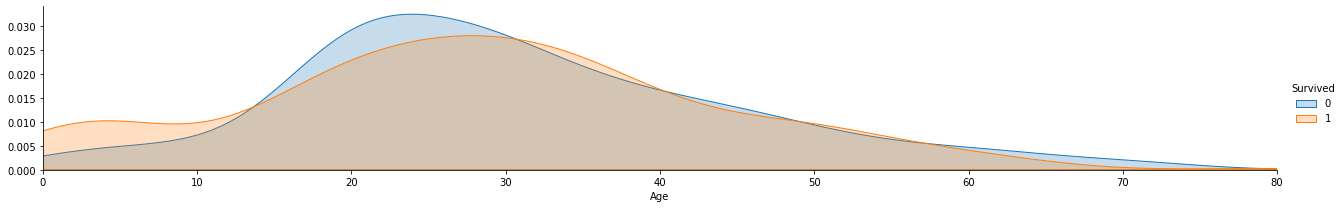

In [41]:
#Age
#plot distributions of age of passengers who survived or did not survive
a = sns.FacetGrid( titanic, hue = 'Survived', aspect=6 )
a.map(sns.kdeplot, 'Age', shade= True )
a.set(xlim=(0 , titanic['Age'].max()))
a.add_legend()

The best categories for age are:

0: Less than 14
1: 14 to 30
2: 30 to 40
3: 40 to 50
4: 50 to 60
5: 60 and more

In [43]:
#for dataset in :
# Qcut is a quantile based discretization function to autimatically create categories (not used here)
# dataset['Age'] = pd.qcut(dataset['Age'], 6, labels=False)
# Using categories as defined above
titanic.loc[ titanic['Age'] <= 14, 'Age'] = 0
titanic.loc[(titanic['Age'] > 14) & (titanic['Age'] <= 30), 'Age'] = 5
titanic.loc[(titanic['Age'] > 30) & (titanic['Age'] <= 40), 'Age'] = 1
titanic.loc[(titanic['Age'] > 40) & (titanic['Age'] <= 50), 'Age'] = 3
titanic.loc[(titanic['Age'] > 50) & (titanic['Age'] <= 60), 'Age'] = 2
titanic.loc[ titanic['Age'] > 60, 'Age'] = 4
titanic['Age'].value_counts()

5    435
1    214
3    100
0     78
2     42
4     22
Name: Age, dtype: int64

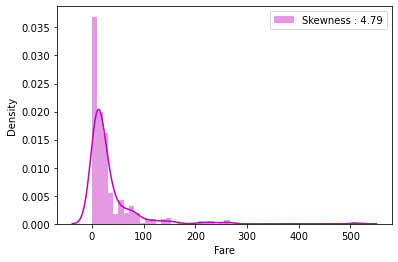

In [44]:
# Remove all NULLS in the Fare column and create a new feature Categorical Fare
titanic['Fare'] = titanic['Fare'].fillna(titanic['Fare'].median())
# Explore Fare distribution 
g = sns.distplot(titanic["Fare"], color="m", label="Skewness : %.2f"%(titanic["Fare"].skew()))
g = g.legend(loc="best")

Observations

The Fare distribution is very skewed to the left. This can lead to overweigthing the model with very high values.
In this case, it is better to transform it with the log function to reduce the skewness and redistribute the data.

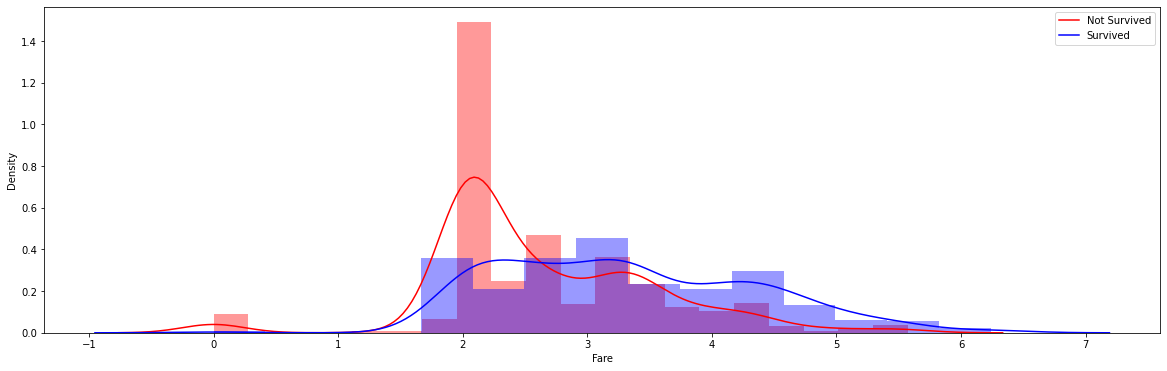

In [45]:
# Apply log to Fare to reduce skewness distribution
titanic["Fare"] = titanic["Fare"].map(lambda i: np.log(i) if i > 0 else 0)
a4_dims = (20, 6)
fig, ax = plt.subplots(figsize=a4_dims)
g = sns.distplot(titanic["Fare"][titanic["Survived"] == 0], color="r", label="Skewness : %.2f"%(titanic["Fare"].skew()), ax=ax)
g = sns.distplot(titanic["Fare"][titanic["Survived"] == 1], color="b", label="Skewness : %.2f"%(titanic["Fare"].skew()))
#g = g.legend(loc="best")
g = g.legend(["Not Survived","Survived"])

Observations Log Fare categories are:

0 to 2.7: less survivors
More than 2.7 more survivors

In [46]:
#Model Deployment
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [47]:
# X_train (all features for training purpose but excluding Survived),
# Y_train (survival result of X-Train) and test are our 3 main datasets for the next sections
X_train = titanic.drop("Survived", axis=1)
Y_train = titanic["Survived"]
X_train.shape, Y_train.shape

((891, 17), (891,))